
# Comparison Pizza (Percentiles)

* Author: [slothfulwave612](https://twitter.com/slothfulwave612)

* ``mplsoccer``, ``py_pizza`` module helps one to plot pizza charts in a few lines of code.

* The design idea is inspired by [Tom Worville](https://twitter.com/Worville), [Football Slices](https://twitter.com/FootballSlices) and [Soma Zero FC](https://twitter.com/somazerofc)

* We have re-written [Soumyajit Bose's](https://twitter.com/Soumyaj15209314)  pizza chart code to enable greater customisation.

Here we plot a pizza chart for comparing two players.


In [24]:
from urllib.request import urlopen

import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd 
import matplotlib as mpl
import os
from matplotlib import font_manager as fm, rcParams
from matplotlib.font_manager import FontProperties

from mplsoccer import PyPizza, add_image, FontManager
from highlight_text import fig_text

## Load some fonts
We will use mplsoccer's FontManager to load some fonts from Google Fonts.
We borrowed the FontManager from the excellent
[ridge_map library](https://github.com/ColCarroll/ridge_map).



In [25]:
font_normal = FontManager('https://raw.githubusercontent.com/googlefonts/roboto/main/'
                          'src/hinted/Roboto-Regular.ttf')
font_italic = FontManager('https://raw.githubusercontent.com/googlefonts/roboto/main/'
                          'src/hinted/Roboto-Italic.ttf')
font_bold = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
                        'RobotoSlab[wght].ttf')

## Load Players Stats

In [52]:
player_fbref_link_1 = "https://fbref.com/en/players/c9817014/scout/365_m1/Manuel-Ugarte-Ribeiro-Scouting-Report"
#player_fbref_link_2 = "https://fbref.com/en/players/c6220452/scout/365_m1/Kobbie-Mainoo-Scouting-Report"
player_fbref_link_3 = "https://fbref.com/en/players/4d224fe8/scout/365_m1/Casemiro-Scouting-Report"

#Player_1
df = pd.read_html(player_fbref_link_1)
df = df[2]
df = df[:].values
df = pd.DataFrame(df[:,1:3], index=df[:,0])
df = df.drop(['Shooting', 'Statistic'], axis = 0)

df = df.T
df = df.dropna(axis= 1)
df = df.loc[:,~df.columns.duplicated()]
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]

#Player_2
"""
df2 = pd.read_html(player_fbref_link_2)
df2 = df2[2]
df2 = df2[:].values
df2 = pd.DataFrame(df2[:,1:3], index=df2[:,0])
df2 = df2.drop(['Shooting', 'Statistic'], axis = 0)

df2 = df2.T
df2 = df2.dropna(axis= 1)
df2 = df2.loc[:,~df2.columns.duplicated()]
cols = df2.columns.tolist()
cols = cols[-1:] + cols[:-1]
"""
#Player_3
df3 = pd.read_html(player_fbref_link_3)
df3 = df3[4]
df3 = df3[:].values
df3 = pd.DataFrame(df3[:,1:3], index=df3[:,0])
df3 = df3.drop(['Shooting', 'Statistic'], axis = 0)

df3 = df3.T
df3 = df3.dropna(axis= 1)
df3 = df3.loc[:,~df3.columns.duplicated()]
cols = df2.columns.tolist()
cols = cols[-1:] + cols[:-1]

In [53]:
print(df.columns.tolist())

['Goals', 'Assists', 'Goals + Assists', 'Non-Penalty Goals', 'Penalty Kicks Made', 'Penalty Kicks Attempted', 'Yellow Cards', 'Red Cards', 'xG: Expected Goals', 'npxG: Non-Penalty xG', 'xAG: Exp. Assisted Goals', 'npxG + xAG', 'Progressive Carries', 'Progressive Passes', 'Progressive Passes Rec', 'Shots Total', 'Shots on Target', 'Shots on Target %', 'Goals/Shot', 'Goals/Shot on Target', 'Average Shot Distance', 'Shots from Free Kicks', 'npxG/Shot', 'Goals - xG', 'Non-Penalty Goals - npxG', 'Passing', 'Passes Completed', 'Passes Attempted', 'Pass Completion %', 'Total Passing Distance', 'Progressive Passing Distance', 'Passes Completed (Short)', 'Passes Attempted (Short)', 'Pass Completion % (Short)', 'Passes Completed (Medium)', 'Passes Attempted (Medium)', 'Pass Completion % (Medium)', 'Passes Completed (Long)', 'Passes Attempted (Long)', 'Pass Completion % (Long)', 'xA: Expected Assists', 'Key Passes', 'Passes into Final Third', 'Passes into Penalty Area', 'Crosses into Penalty Area

## Comparison Chart
To plot comparison chart one have to pass list of values to ``compare_values`` argument.



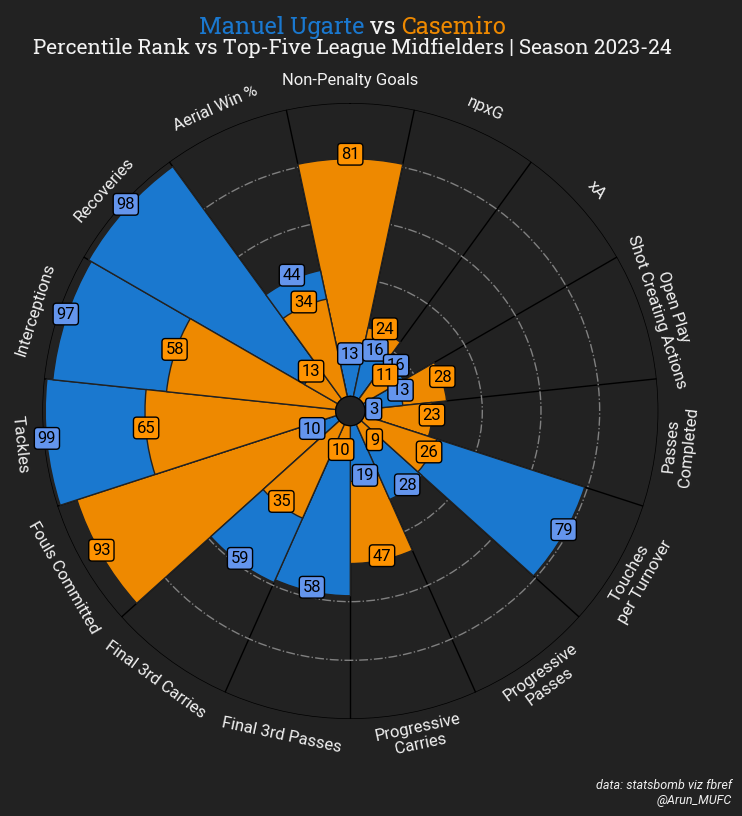

In [51]:
# parameter and values list
# The values are taken from the excellent fbref website (supplied by StatsBomb)
# parameter list
params = ["Non-Penalty Goals", "npxG", "xA", "Open Play\nShot Creating Actions",
          "Passes\nCompleted", "Touches\nper Turnover", "Progressive\nPasses",
          "Progressive\nCarries", "Final 3rd Passes", "Final 3rd Carries", "Fouls Committed",
          "Tackles ", "Interceptions", "Recoveries", "Aerial Win %"]
#values = [99, 99, 87, 51, 62, 58, 45, 40, 27, 74, 77, 73]    # for Robert Lewandowski
#values_2 = [83, 75, 55, 62, 72, 92, 92, 79, 64, 92, 68, 31]  # for Mohamed Salah

# color for the text
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#222222",     # background color
    straight_line_color= "#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    last_circle_color="#000000",    # color of last circle
    other_circle_ls="-.",           # linestyle for other circles
    other_circle_lw=1               # linewidth for other circles
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                     # list of values
    compare_values=values_2,   # comparison values
    figsize=(8, 8),             # adjust figsize according to your need
    kwargs_slices=dict(
        facecolor="#1A78CF", edgecolor="#222222",
        zorder=2, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_compare=dict(
        facecolor="#EE8900", edgecolor="#222222",
        zorder=2, linewidth=1,
    ),
    kwargs_params=dict(
        color="#F2F2F2", fontsize=12,
        fontproperties=font_normal.prop, va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    ),                          # values to be used when adding parameter-values labels
    kwargs_compare_values=dict(
        color="#000000", fontsize=12, fontproperties=font_normal.prop, zorder=3,
        bbox=dict(edgecolor="#000000", facecolor="#FF9300", boxstyle="round,pad=0.2", lw=1)
    ),                          # values to be used when adding parameter-values labels
)

# add title
fig_text(
    0.515, 0.99, "<Manuel Ugarte> vs <Casemiro>", size=17, fig=fig,
    highlight_textprops=[{"color": '#1A78CF'}, {"color": '#EE8900'}],
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Percentile Rank vs Top-Five League Midfielders | Season 2023-24",
    size=15,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)

# add credits
CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "@Arun_MUFC"

fig.text(
    0.99, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    fontproperties=font_italic.prop, color="#F2F2F2",
    ha="right"
)

plt.show()

## Adjust Overlapping Values
To adjust overlapping values one can use ``adjust_texts()`` method.
The user have to pass ``params_offset`` list
which will contain bool values denoting which parameter's text is to be adjusted,
an ``offset`` value denoting how much adjustment will be made,
and if the user wants to adjust the comparison-text then can pass
``adj_comp_values=True`` to the ``adjust_texts()`` method. Below is an example code.



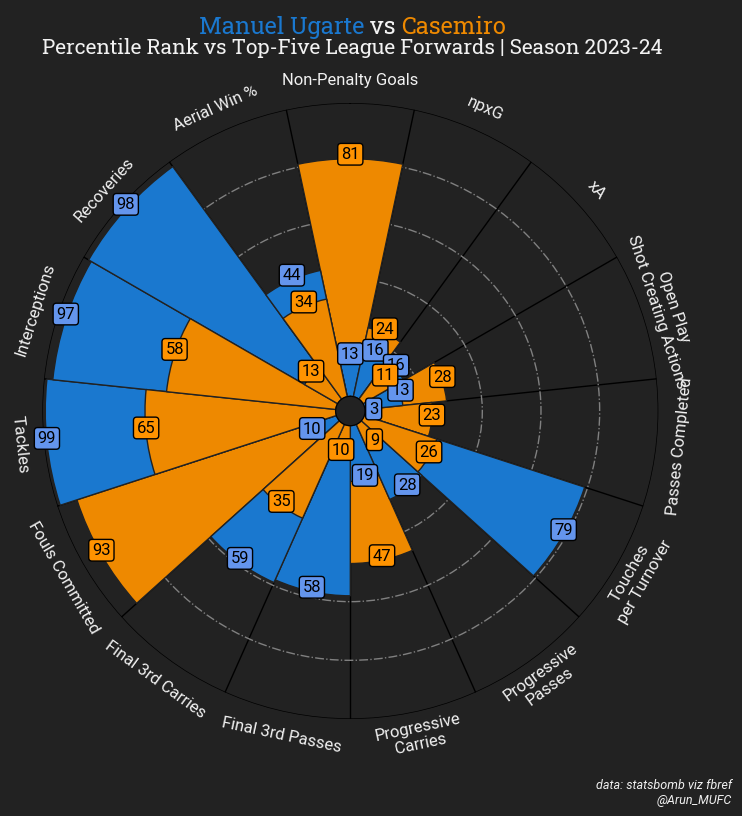

In [50]:
# parameter and values list
params = ["Non-Penalty Goals", "npxG", "xA", "Open Play\nShot Creating Actions",
          "Passes\nCompleted", "Touches\nper Turnover", "Progressive\nPasses",
          "Progressive\nCarries", "Final 3rd Passes", "Final 3rd Carries", "Fouls Committed",
          "Tackles ", "Interceptions", "Recoveries", "Aerial Win %"]

# dummy values
#values = [15, 7, 57, 86, 63, 51, 11, 32, 85, 69, 90, 54]    # for Player 1
#values_2 = [31, 41, 43, 42, 47, 24, 60, 60, 28, 70, 92, 64]  # for Player 2

# pass True in that parameter-index whose values are to be adjusted
# here True values are passed for "\nTouches\nper Turnover" and "pAdj\nPress Regains" params
params_offset = [
    False, False, False , False, False, False, False,
    False, False, False, False, False, False, False, False
]

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#222222",     # background color
    straight_line_color= "#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    last_circle_color="#000000",    # color of last circle
    other_circle_ls="-.",           # linestyle for other circles
    other_circle_lw=1               # linewidth for other circles
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                     # list of values
    compare_values=values_2,   # comparison values
    figsize=(8, 8),             # adjust figsize according to your need
    kwargs_slices=dict(
        facecolor="#1A78CF", edgecolor="#222222",
        zorder=2, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_compare=dict(
        facecolor="#EE8900", edgecolor="#222222",
        zorder=2, linewidth=1,
    ),
    kwargs_params=dict(
        color="#F2F2F2", fontsize=12,
        fontproperties=font_normal.prop, va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    ),                          # values to be used when adding parameter-values labels
    kwargs_compare_values=dict(
        color="#000000", fontsize=12, fontproperties=font_normal.prop, zorder=3,
        bbox=dict(edgecolor="#000000", facecolor="#FF9300", boxstyle="round,pad=0.2", lw=1)
    ),                          # values to be used when adding parameter-values labels
)

# adjust text for comparison-values-text
baker.adjust_texts(params_offset, offset=-0.17, adj_comp_values=True)

# add title
fig_text(
    0.515, 0.99, "<Manuel Ugarte> vs <Casemiro>", size=17, fig=fig,
    highlight_textprops=[{"color": '#1A78CF'}, {"color": '#EE8900'}],
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Percentile Rank vs Top-Five League Forwards | Season 2023-24",
    size=15,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)

# add credits
CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "@Arun_MUFC"

fig.text(
    0.99, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    fontproperties=font_italic.prop, color="#F2F2F2",
    ha="right"
)

plt.show()